- We can not use `LinearSVC` for non-linearly separable dataset
- One approach to handling nonlinear datasets is to add more features, such as polynomial features, then apply the `LinearSVC`

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

### Creating data

In [7]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

print(X.shape)
print(y.shape)
print(np.unique(y))

(100, 2)
(100,)
[0 1]


### Plotting data

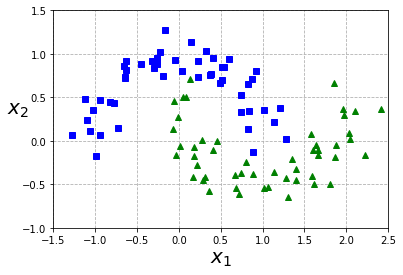

In [10]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both', linestyle="--")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## <font color=green>Add polynomial features and then use the LinearSVC </font>

### Create pipeline

In [17]:
poly_svc = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge", max_iter=1500))
])

### Training

In [18]:
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1500, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [20]:
print(poly_svc.decision_function(X).shape)

(100,)


### Plot prediction

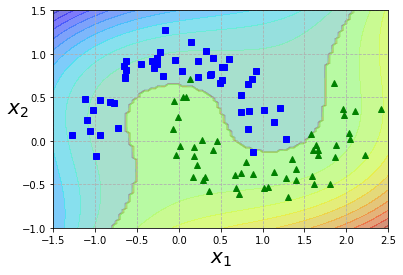

In [36]:
def plot_predictions(clf, axes):
    
    # generate data along x-axis
    x0s = np.linspace(axes[0], axes[1], 100)
    # generate data along y-axis
    x1s = np.linspace(axes[2], axes[3], 100)
    # create the grid using np
    x0, x1 = np.meshgrid(x0s, x1s)
    # create input data from these grid points
    X = np.c_[x0.ravel(), x1.ravel()]  # shape=(10000, 2)
    
    # make predictions
    # clf.predict(X).shape = (10000), x0.shape = (100, 100)
    y_pred = clf.predict(X).reshape(x0.shape)
    # get the decision_function
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    # contour plot of x0, x1, y_pred shows 2 areas
    # one area for positive class (ypred==1), one for negative class (ypred==0)    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    
    # we also one to have the decison boundary
    # we can plot it using x0, x1, y_decision
    # https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict
    # decision function tell us, for each instance, on which side of the hyperplane the instance is
    # and how far the instance from that hyperplane
    # print(np.max(y_decision), np.min(y_decision))
    plt.contourf(x0, x1, y_decision, 20, cmap=plt.cm.jet, alpha=0.4)

plot_predictions(poly_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

## <font color=green>Using polynomial kernel of the SVC class </font>

- Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs),
- But at a low polynomial degree it cannot deal with very complex datasets
- with a high polynomial degree it creates a huge number of features, making the model too slow.
- __Apply _kernel trick_: give the same results without really adding polynomial features__

### Pipelines

In [38]:
from sklearn.svm import SVC


# The hyperparameter coef0 controls how much the model is influenced by highdegree
# polynomials versus low-degree polynomials.

poly_kernel_svc_d3_r1 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

poly_kernel_svc_d10_r100 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
))

### Train

In [41]:
poly_kernel_svc_d3_r1.fit(X, y)
poly_kernel_svc_d10_r100.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

### Plot predictions

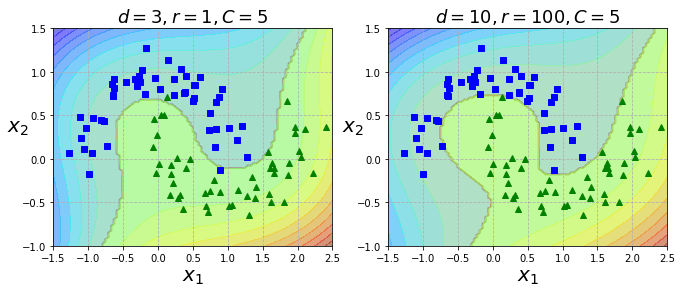

In [42]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svc_d3_r1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svc_d10_r100, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## <font color=green>Adding Similarity Features </font>

- One example is using similarity function called Gaussian _Radial Basic Function_
- This can be done using the _kernel trick_

### Model and train

In [44]:
from sklearn.svm import SVC

rbf_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("rbd_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))

rbf_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbd_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### Note about hyperparameters

- `gamma` acts like a regularization hyperparameter: big `gamma` => more complicated model, small `gamma` reduces overfitting
- `C`: same as `gamma`

### Tuning hyperparameters

In [46]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

### Plot predictions

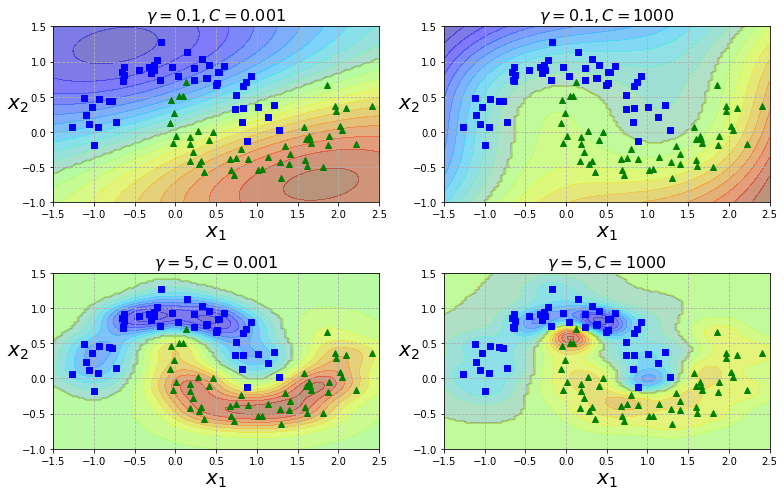

In [48]:
plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.tight_layout()

# save_fig("moons_rbf_svc_plot")

## <font color=green>Important notes </font>

With so many kernels to choose from, how can you decide which one to use? 

- As a rule of thumb, you should __always try the linear kernel first__ (remember that LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features. 
- If the training set is not too large, you should __try the Gaussian RBF kernel__ as well; it works well in most cases.
- Then if you have spare time and computing power, you can also experiment with a few other kernels using __cross-validation and grid search__, especially if there are kernels specialized for your training set’s data structure.